# Phys555 Assignment 2 Question 1
Karlee Zammit - V00823093

## Datasets, Data Mining, and Data Visualization (using PCA)

Q1- Find two 'suitable' and 'challenging' data sets; one for regression and another for a classification problem. Describe the two data sets in one notebook (inputs and targets) and explain how they can be used for regression and classification. Write about works/applications that have been previously done regarding the chosen data sets. Also, conduct data mining, such as feature visualization and present informative data, using PCA.

# Introduction 
Regression and classification are both predictive problems where past information is used to predict future observations. The goal of regression is to predict numerical values, and the goal of classification is predict categorical values. 

In this assignment, I present two different datasets - one for classification and one for regression. 

## Regression
As stated in Bishop, C. M. (2006), the goal of regression is to predict the value of one or more continuous target variables t given the value of a D-dimensional vector x of input variables. 

### Linear Regression

Below I provide a summary of linear regression as explained in Bishop, C. M. (2006):

Linear models form the basis for more sophisticated regression models. Linear models involve a linear combination of input variables

$y(x,w) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}$

where 

$x = (x_{1},....,x_{D})^{T}$. This is known as linear regression. 

A significant limitation of linear regression is that it only allows for a linear function of the input variables. To extend linear models, linear combinations of fixed non-linear functions can be considered, of the form 

$y(x,w) = w_{0} + \sum_{j=1}^{M-1}w_{j}\sigma_{j}(x)$

where $\sigma_{j}(x)$ are basis functions and the total number of parameters in the model is M. 

For this assignment, the dataset I chose is based on weather variables. I decided to use the all variables excluding temperature to predict the temperature. 

### K-Nearest Neighbours
The KNN regression algorithm has the ability to work well with non-linear relationships, because it uses nearest neighbours to predict future observations. 

## Classification
Classification is using one or more variables to predict a categorical variable of interest.



## Regression Dataset

There are many available datasets ranging in sample size and complexity available for free online. Although this is true, it was challenging to find a dataset with more than 5000 samples that had more than one principal component corresponding to 90% of the data. Many datasets I explored looked complex at first glance, but after PCA, one principal component could explain the data. This was to my dissapointment as these datasets were well documented, and had many citeable works. As one part of this assignment was to discuss previous work applied to the data, I searched high and low for an appropriate dataset. 

I performed PCA analysis on these datasets:
Abalone: https://archive.ics.uci.edu/ml/datasets/abalone
- Had one principal component making up 90% of the data 
- Only 4177 samples 
- Lots of cited work 
CalCOFI Hydrographic Database: https://calcofi.com/index.php?option=com_content&view=category&layout=blog&id=14&Itemid=835
- Had only one principal component, unless I kept the "dark assimilation" variable, which in my opinion, is not the best dataset to work with for this assignment as dropping one variable reduces the complexity immensely 

I finally settled on a dataset found on Kaggle called "Szeged Weather":
https://www.kaggle.com/datasets/budincsevity/szeged-weather

This dataset includes hourly/daily summaries of temperature, pressure, wind speed, humidity, and other variables (12 total), from Szeged, Hungary between 2006 to 2016. This dataset has thousands of downloads and hundreds of notebooks on Kaggle, but does not have a DOI or citeable works. 

*This has inspired me for my final project to consider using Environment Canada's weather data, which is publicly available and free. For this assignment, I did not have time to understand their website enough for a reasonably quick download of the data.*

The following scripts walk through data mining that was necessary before further analysis could be done. 

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

(96453, 12)
517
(95936, 12)
Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')
(95936, 6)


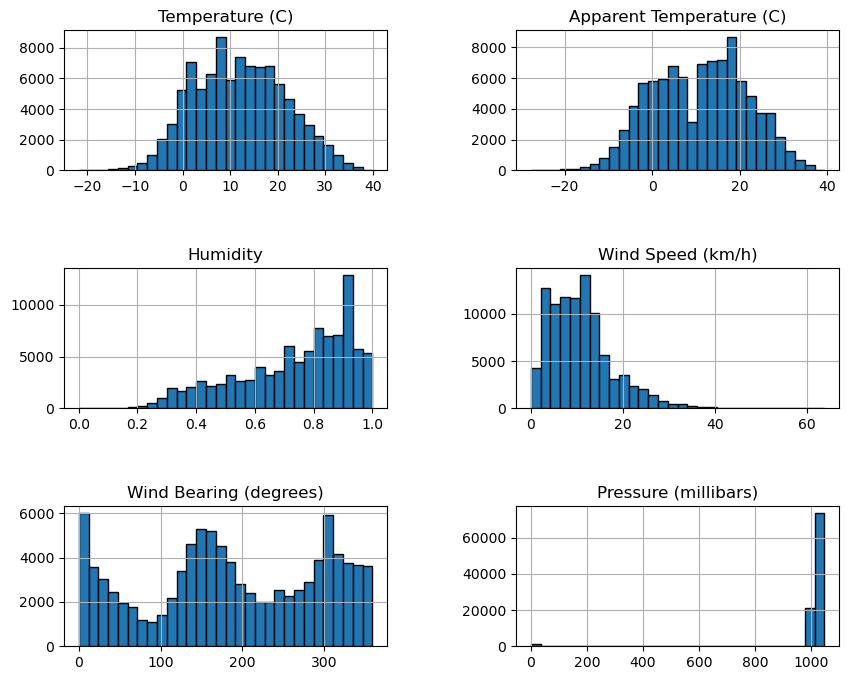

In [2]:
# Read the weather data csv and print the shape
weather = pd.read_csv(r'weatherHistory.csv', delimiter=',')
print(weather.shape)

# Count nans that exist in the data, and drop rows containing nans
nan_count = weather.isna().sum().sum()
print(nan_count)
weather=weather.dropna(axis=0)

# Print the shape of the data after rows containing nans were removed
print(weather.shape)
print(weather.columns)

# Drop non-numerical rows for the purposes of this analysis
weather = weather.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Precip Type', 'Loud Cover', 'Visibility (km)'], axis=1)
print(weather.columns)
print(weather.shape)

# Plot histograms of the data
weather.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


The pressure and humidity histograms look like they'll need some further data mining. Pressure of 0 millibars is impossible on Earth, and so these values must correspond to instrument error. Humidity of 0 means that there is no water vapour in the air, and it is known that water vapour is always present in the air, even if only in trace amounts. I will remove rows of data corresponding to 0 millibars and rows corresponding to 0 humidity. 

In [3]:
# Create a new dataframe with only rows corresponding to zero pressure
zero_press_df = weather.loc[ weather['Pressure (millibars)'] == 0]
# Print how many rows of 0 pressure there are
#print(zero_press_df)
print(zero_press_df.shape)

# Plot a histogram of 0 pressure data
#zero_press_df.hist(figsize=(10, 8), bins=30, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Remove 0 pressure from the data, and ensure this was done correctly
# by calculating the difference in sizes before and after removal
weather_mined = weather.loc[weather['Pressure (millibars)'] != 0]
print(weather.shape)
print(weather_mined.shape)
difference = weather.shape[0] -  weather_mined.shape[0]
print(difference)

(1288, 6)
(95936, 6)
(94648, 6)
1288


(22, 6)
(94626, 6)
1310


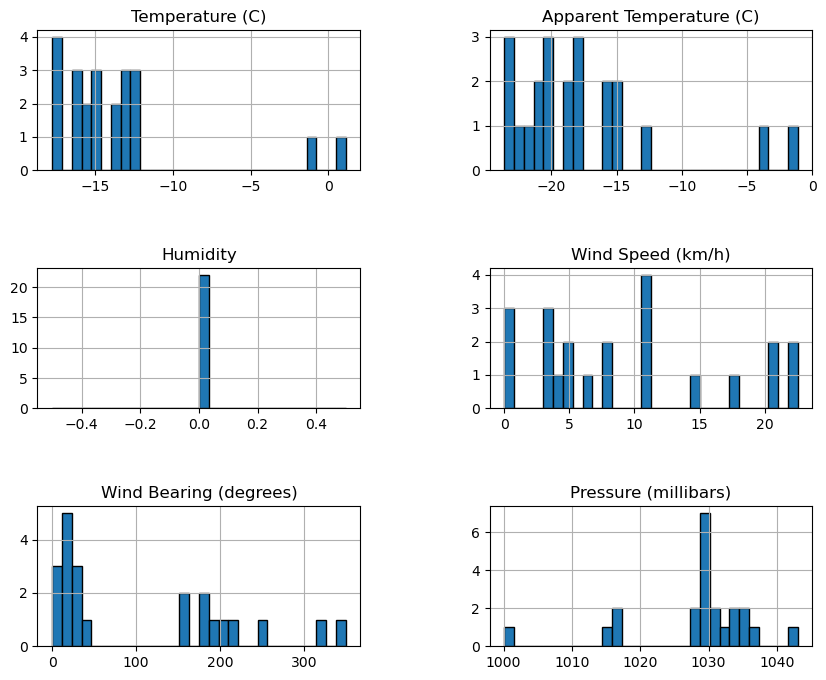

In [4]:
# Investigate zero humidity data
zero_humid_df = weather_mined.loc[weather_mined['Humidity'] == 0]
print(zero_humid_df.shape)

# Plot histograms of this data
zero_humid_df.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# As was done with pressure, remove rows corresponding to 0 humidity
weather_mined = weather_mined.loc[weather_mined['Humidity'] != 0]
print(weather_mined.shape)
difference = weather.shape[0] -  weather_mined.shape[0]
print(difference) # Diff from original is 1310, which is 1288 + 22 = 1310 so this checks out 

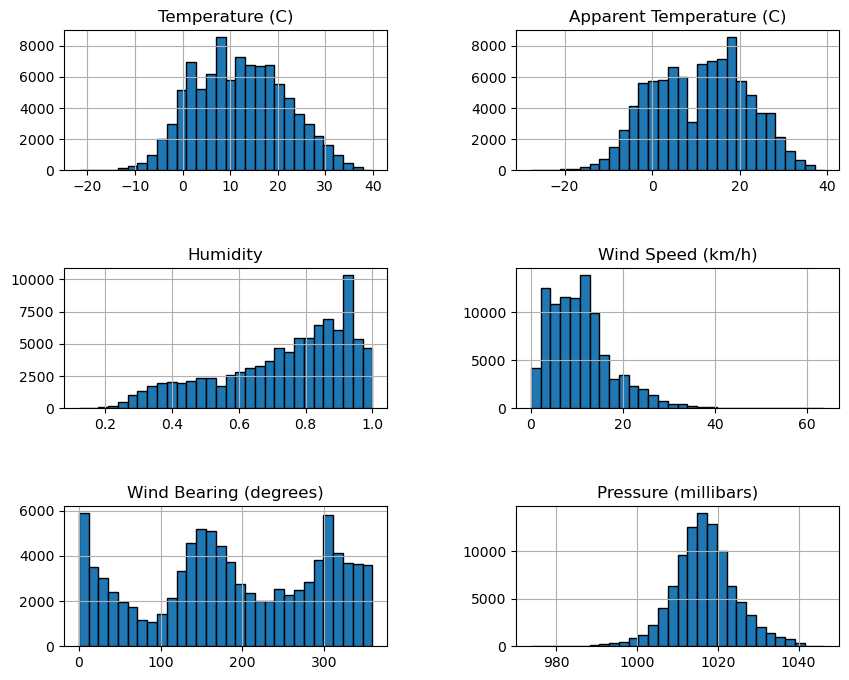

In [5]:
# Let's plot the mined data once more to see if anything was missed 
weather_mined.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# This looks a lot nicer!

Although I have performed some data mining, it is still likely that there are outliers, or noise, in this data that I was not able to determine from the rules applied above. This is important to be kept in mind as this noise can affect the prediction of future observations from this known data. This will be discussed further in question 2.

I will now perform principal component analysis to show the complexity of the data, and how many components are needed to describe the data.

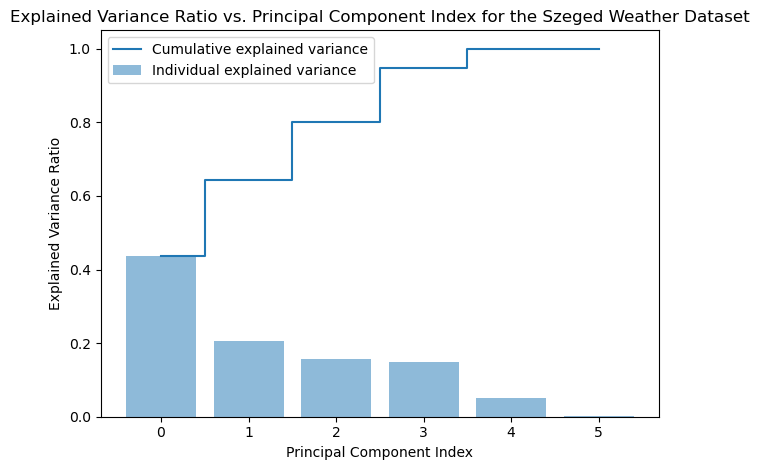

In [6]:
## Normalize the data

# Initialize the normalization estimator 
sc = StandardScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(weather_mined)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(weather_mined)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Szeged Weather Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above PCA analysis, 5 principal components are needed to describe 100% of the information in the data. The first principal component can describe approximately 43% of the data, the second approximately 38% of the data, the third less than 20% of the data, etc. 

I concluded that this dataset provided an appropriate level of complexity and number of components for the purposes of this assignment. 

## Classification Dataset

For classification, I decided to stick with the weather theme, and found a dataset that can be used to predict if it will rain or not. This dataset is once again from Kaggle, titled "Houston Weather Data".
https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data

The data is presented in 10 separate csv files, which I append together and perform data mining on so that the dataset could be used for classification. 

*Once again, I could use Environment Canada's weather data instead for the same classification task. An idea for the future!*

(365, 16)
(365, 16)
(365, 16)
(366, 16)
(730, 16)
(3651, 16)
(3651, 16)
Index(['date', 'min_temp', 'max_temp', 'rainfall', 'wind_speed9am',
       'wind_speed3pm', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm',
       'rain_today', 'rain_tomorrow'],
      dtype='object')
           date  min_temp  max_temp  rainfall wind_speed9am wind_speed3pm  \
0    2006-01-01      64.0      81.0       0.0           8.0          14.0   
1    2006-01-02      57.0      79.0       0.0           9.0          10.0   
2    2006-01-03      49.0      79.0       0.0           0.0          10.0   
3    2006-01-04      52.0      76.0       0.0           7.0           7.0   
4    2006-01-05      51.0      69.0       0.0          16.0          23.0   
..          ...       ...       ...       ...           ...           ...   
360  2021-12-27      68.0      81.0       0.0           5.0          16.0   
361  2021-12-28      72.0      84.0       0.0 

Index(['min_temp', 'max_temp', 'rainfall', 'wind_speed9am', 'wind_speed3pm',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am',
       'temp3pm'],
      dtype='object')

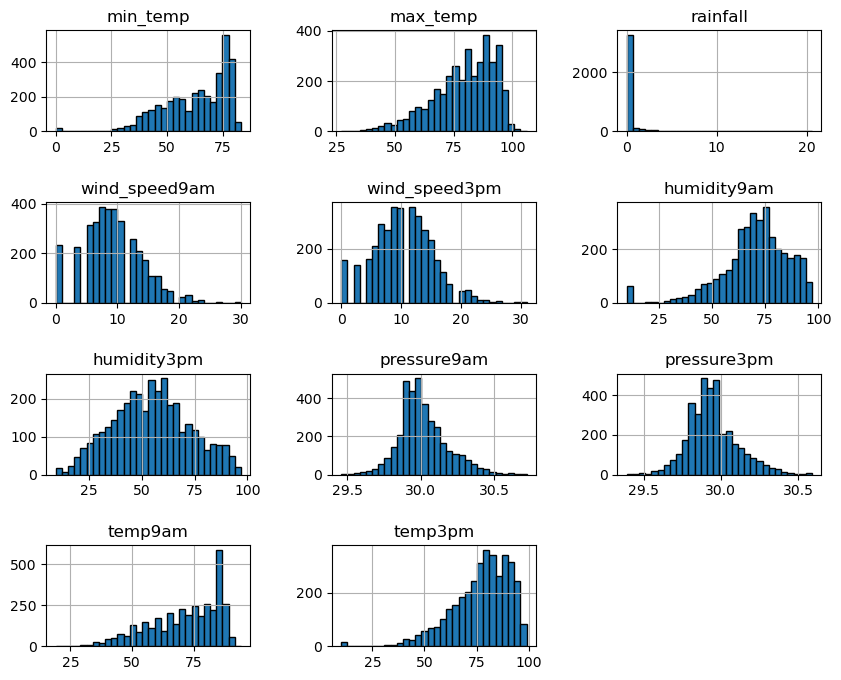

In [7]:
# Load in csv data
htx_2006 = pd.read_csv('htx_2006_weather.csv')
print(htx_2006.shape)
htx_2010 = pd.read_csv('htx_2010_weather.csv')
print(htx_2010.shape)
htx_2011 = pd.read_csv('htx_2011_weather.csv')
print(htx_2011.shape)
htx_2012 = pd.read_csv('htx_2012_weather.csv')
print(htx_2012.shape)
htx_2013 = pd.read_csv('htx_2013_weather.csv')
htx_2014 = pd.read_csv('htx_2014_weather.csv')
htx_2015 = pd.read_csv('htx_2015_weather.csv')
htx_2018 = pd.read_csv('htx_2018_weather.csv')
htx_2019 = pd.read_csv('htx_2019_weather.csv')
htx_2021 = pd.read_csv('htx_2021_weather.csv')

# Append the first two together
htx = htx_2006.append(htx_2010)
print(htx.shape)

# Make a list of the rest of the years 
years = [htx_2011, htx_2012, htx_2013, htx_2014, htx_2015, htx_2018, htx_2019, htx_2021]

# Loop through all of the years and append them 
for year in years: 
    htx = htx.append(year)
    
print(htx.shape)

# Drop nans from the data by row
htx=htx.dropna(axis=0)
print(htx.shape)
print(htx.columns)

#htx.hist(figsize=(10, 8), bins=30, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)

print(htx)

# Determine columns that are not numeric 
result = htx.applymap(np.isreal)

# Replace 'Blank's with nans
htx = htx.replace('Blank', np.nan)

# And then remove the rows containing these nans
htx=htx.dropna(axis=0)
print(htx.shape)

# Change strings to floats where applicable
htx['wind_speed9am'] = pd.to_numeric(htx['wind_speed9am'])
htx['wind_speed3pm'] = pd.to_numeric(htx['wind_speed3pm'])
htx['humidity9am'] = pd.to_numeric(htx['humidity9am'])
htx['humidity3pm'] = pd.to_numeric(htx['humidity3pm'])
htx['pressure9am'] = pd.to_numeric(htx['pressure9am'])
htx['pressure3pm'] = pd.to_numeric(htx['pressure3pm'])
htx['temp9am'] = pd.to_numeric(htx['temp9am'])
htx['temp3pm'] = pd.to_numeric(htx['temp3pm'])

# Plot a histogram of the data
htx.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Drop non-numeric columns
htx = htx.drop(['date', 'cloud9am', 'cloud3pm', 'rain_today', 'rain_tomorrow'], axis=1)
htx.columns

     min_temp  max_temp  rainfall  wind_speed9am  wind_speed3pm  humidity9am  \
0        64.0      81.0       0.0            8.0           14.0         90.0   
1        57.0      79.0       0.0            9.0           10.0         87.0   
2        49.0      79.0       0.0            0.0           10.0         60.0   
3        52.0      76.0       0.0            7.0            7.0         87.0   
4        51.0      69.0       0.0           16.0           23.0         42.0   
..        ...       ...       ...            ...            ...          ...   
360      68.0      81.0       0.0            5.0           16.0         87.0   
361      72.0      84.0       0.0           14.0           15.0         74.0   
362      72.0      84.0       0.0            9.0           12.0         85.0   
363      67.0      83.0       0.0            8.0            9.0         84.0   
364      73.0      85.0       0.0           10.0           17.0         87.0   

     humidity3pm  pressure9am  pressure

<AxesSubplot:>

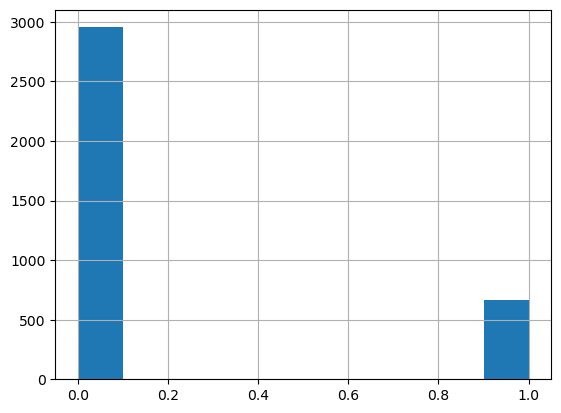

In [8]:
# Create a new column called "rain", and set to 1 if the rainfall
# was larger than 0, and 0 if it did not ran. 
htx.loc[htx['rainfall'] > 0.0, 'rain'] = 1
htx.loc[htx['rainfall'] <= 0.0, 'rain'] = 0
print(htx)

# See how many days it rained on 
sum(htx['rain'])

# Plot a histogram of the rainy vs non-rainy day to see if the data 
# is balanced
htx['rain'].hist()

As seen in the above plot, the data is not balanced, meaning there are far fewer rainy days not rainy days. Because of this, when splitting this data into training and testing, it will be thoroughly trained on how to predict not rainy days, but it will perform worse at predicting rainy days. Before classification can be completed, the data should be balanced with a technique such as bootstrapping. 

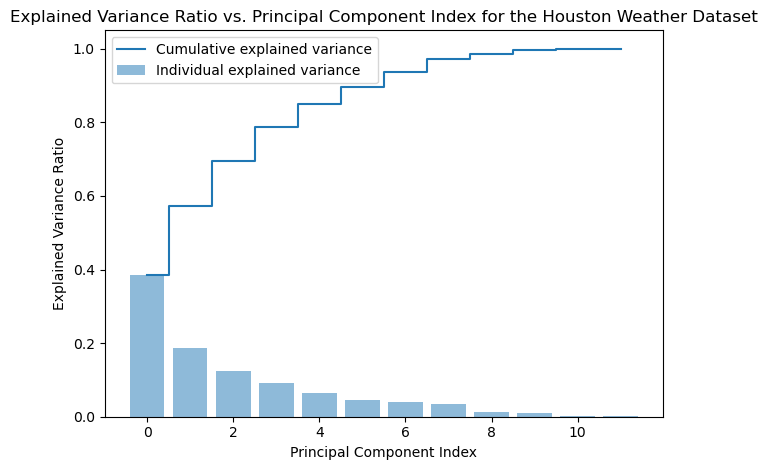

In [9]:
# Perform PCA analysis
sc = StandardScaler()

# Train the estimator on the input data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(htx)

# Apply the method to the data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(htx)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Houston Weather Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above PCA analysis, 11 principal components are needed to describe 100% of the information in the data. The first principal component can describe approximately 40% of the data, the second approximately 20% of the data, the third less than 20% of the data, etc. 

### How can this dataset be used for classification? 

Once data mining and balancing has been completed, this dataset can be used to predict if a future observation will have the outcome of rain or no rain. Classification algorithms use the input variables (in this case min_temp, max_temp, rainfall, wind_speed9am, wind_speed3pm, humidity9am, etc.) to train the machine learning algorithm to understand the connection between these variables, to predict if their specific combination will lead to rain or not. 

## References



Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

https://www.kaggle.com/datasets/sohier/calcofi?resource=download

https://calcofi.com/

https://www.kaggle.com/datasets/budincsevity/szeged-weather

https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data

http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset